# Eksplorasi Dataset

In [28]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [29]:
# Fungsi untuk memuat gambar dan label dari folder dataset
def load_images_from_folder(dataset_path):
    images = []
    labels = []
    class_folders = os.listdir(dataset_path)
    
    # Menentukan label untuk setiap folder
    class_to_label = {
        'Benign': 0,
        '[Malignant] Pre-B': 1,
        '[Malignant] Pro-B': 2,
        '[Malignant] early Pre-B': 3
    }

    # Iterasi di setiap folder kelas untuk memuat gambar
    for class_folder in class_folders:
        class_folder_path = os.path.join(dataset_path, class_folder)
        if os.path.isdir(class_folder_path):
            # Ambil gambar dari folder kelas
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                if image_name.endswith(('.jpg', '.jpeg', '.png')):  # Cek ekstensi file gambar
                    image = cv2.imread(image_path)  # Membaca gambar
                    image = cv2.resize(image, (128, 128))  # Resize gambar ke ukuran yang diinginkan
                    image = image / 255.0  # Normalisasi ke rentang 0-1
                    images.append(image)
                    labels.append(class_to_label[class_folder])  # Menambahkan label sesuai folder
    return np.array(images), np.array(labels)

In [30]:
# Tentukan path dataset
dataset_path = '../data/raw/Blood cell Cancer [ALL]'
images, labels = load_images_from_folder(dataset_path)

In [5]:
# Memeriksa struktur folder
def explore_dataset(dataset_path):
    class_folders = os.listdir(dataset_path)
    class_counts = {}
    
    for class_folder in class_folders:
        subfolder_path = os.path.join(dataset_path, class_folder)
        if os.path.isdir(subfolder_path):
            class_counts[class_folder] = len(os.listdir(subfolder_path))
    return class_counts

In [6]:
# Menampilkan jumlah gambar per kelas
class_counts = explore_dataset(dataset_path)
print(class_counts)

{'Benign': 512, '[Malignant] early Pre-B': 979, '[Malignant] Pre-B': 955, '[Malignant] Pro-B': 796}


In [7]:
# Menampilkan contoh gambar dari setiap kelas
def show_sample_images(dataset_path, class_folders, num_samples=3):
    fig, axes = plt.subplots(len(class_folders), num_samples, figsize=(12, 12))
    
    for idx, class_folder in enumerate(class_folders):
        subclass_path = os.path.join(dataset_path, class_folder)
        images = os.listdir(subclass_path)
        
        for i, image_name in enumerate(images[:num_samples]):
            img_path = os.path.join(subclass_path, image_name)
            image = cv2.imread(img_path)
            axes[idx, i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            axes[idx, i].axis('off')
            axes[idx, i].set_title(f'{class_folder}')
                
    plt.show()

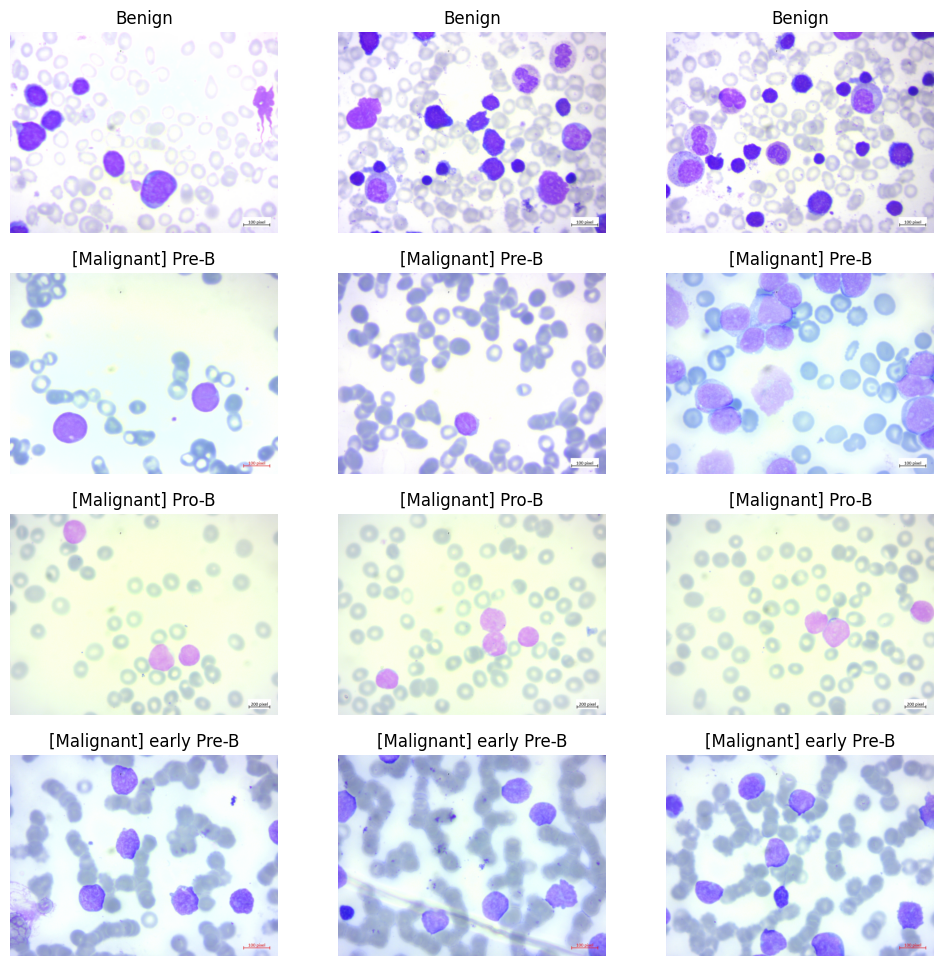

In [8]:
# Tampilkan gambar contoh dari setiap kelas
show_sample_images(dataset_path, class_folders=['Benign', '[Malignant] Pre-B', '[Malignant] Pro-B', '[Malignant] early Pre-B'])

# Pembersihan Data

In [9]:
def check_corrupted_images(dataset_path):
    corrupted_images = []
    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                try:
                    img = cv2.imread(image_path)
                    if img is None:
                        corrupted_images.append(image_path)
                except Exception as e:
                    corrupted_images.append(image_path)
    
    return corrupted_images

In [10]:
# Menampilkan gambar yang korup
corrupted_images = check_corrupted_images(dataset_path)
print("Corrupted images:", corrupted_images)

Corrupted images: []


# Normalisasi dan Ukuran Gambar

In [11]:
def preprocess_image(image_path, target_size=(128, 128)):
    # Membaca gambar
    image = cv2.imread(image_path)
    
    # Mengubah ukuran gambar
    image_resized = cv2.resize(image, target_size)
    
    # Normalisasi nilai piksel
    image_normalized = image_resized / 255.0
    
    return image_normalized

In [12]:
# Fungsi untuk mengambil gambar secara acak dari folder
def get_random_image_path(dataset_path):
    class_folders = os.listdir(dataset_path)
    # Pilih folder kelas secara acak
    class_folder = random.choice(class_folders)
    
    # Pilih gambar acak dari folder kelas tersebut
    class_folder_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_folder_path):
        image_name = random.choice(os.listdir(class_folder_path))
        image_path = os.path.join(class_folder_path, image_name)
        return image_path
    return None

In [15]:
# Ambil path gambar acak dari dataset
sample_image_path = get_random_image_path(dataset_path)
print("Sample Image Path:", sample_image_path)

Sample Image Path: ../data/raw/Blood cell Cancer [ALL]\[Malignant] Pre-B\Snap_292.jpg


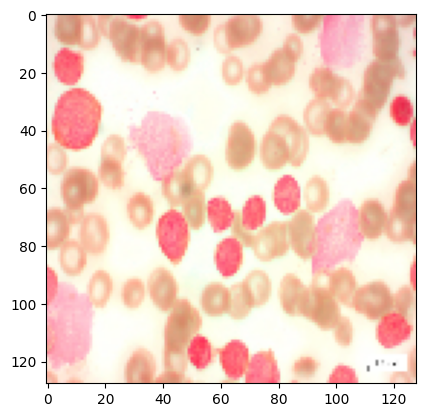

In [16]:
# Sekarang Anda bisa memproses gambar dengan path ini
# Contoh untuk memproses gambar
sample_image = preprocess_image(sample_image_path)
plt.imshow(sample_image)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

# Mengonversi kelas menjadi label numerik
def get_labels_and_classes(dataset_path):
    labels = []
    class_names = []
    
    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)
        if os.path.isdir(class_path):
            class_names.append(class_folder)
            for image_name in os.listdir(class_path):
                labels.append(class_folder)  # Menambahkan label dari kelas
            
    le = LabelEncoder()
    label_encoded = le.fit_transform(labels)
    
    return label_encoded, le.classes_

In [18]:
# Mendapatkan label dan kelas
labels, class_names = get_labels_and_classes(dataset_path)
print("Class Names:", class_names)

Class Names: ['Benign' '[Malignant] Pre-B' '[Malignant] Pro-B'
 '[Malignant] early Pre-B']


# Pengelompokan Label dan Binerisasi Kelas

In [19]:
from sklearn.preprocessing import LabelEncoder

# Mengonversi kelas menjadi label numerik
def get_labels_and_classes(dataset_path):
    labels = []
    class_names = []
    
    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)
        if os.path.isdir(class_path):
            class_names.append(class_folder)
            for image_name in os.listdir(class_path):
                labels.append(class_folder)  # Menambahkan label dari kelas
            
    le = LabelEncoder()
    label_encoded = le.fit_transform(labels)
    
    return label_encoded, le.classes_

In [20]:
# Mendapatkan label dan kelas
labels, class_names = get_labels_and_classes(dataset_path)
print("Class Names:", class_names)

Class Names: ['Benign' '[Malignant] Pre-B' '[Malignant] Pro-B'
 '[Malignant] early Pre-B']


# Augmentasi Data

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [22]:
def augment_image(image):
    # Melakukan augmentasi pada gambar
    image = image.reshape((1,) + image.shape)  # Tambah dimensi untuk batch
    augmented_images = datagen.flow(image, batch_size=1)
    return augmented_images

In [23]:
# Contoh untuk augmentasi gambar
augmented_images = augment_image(sample_image)

# Pemisahan Dataset

In [31]:
from sklearn.model_selection import train_test_split

# Membagi dataset
def split_dataset(images, labels, test_size=0.1, val_size=0.2):
    X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=test_size+val_size, stratify=labels)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Misalnya, gambar dan label sudah ada
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(images, labels)

# Penyimpanan Dataset yang Diproses

In [33]:
import shutil

def save_processed_images(images, labels, save_path):
    for i, image in enumerate(images):
        label = labels[i]
        label_folder = os.path.join(save_path, str(label))
        if not os.path.exists(label_folder):
            os.makedirs(label_folder)
        
        # Simpan gambar
        image_name = f"image_{i}.jpg"
        image_path = os.path.join(label_folder, image_name)
        cv2.imwrite(image_path, image * 255)  # Mengembalikan ke rentang 0-255 untuk penyimpanan

# Menyimpan dataset yang telah diproses
save_processed_images(X_train, y_train, '../data/processed')

# Pengujian Dataset yang Diproses

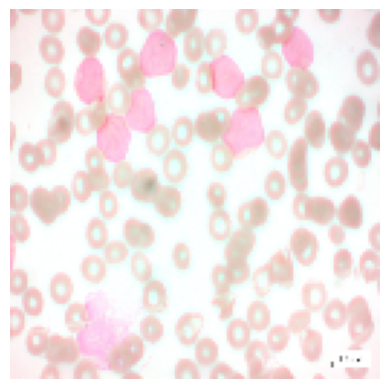

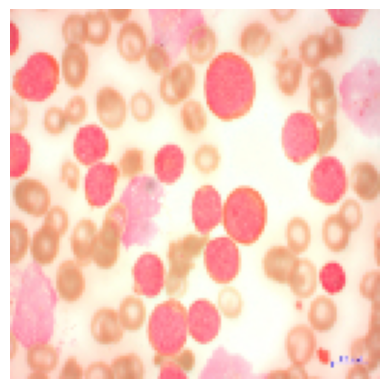

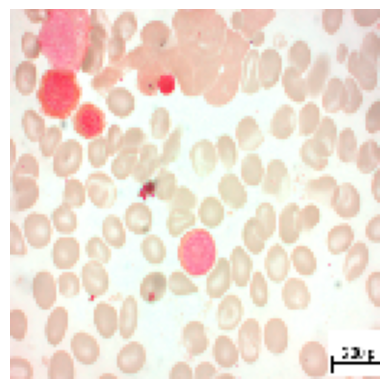

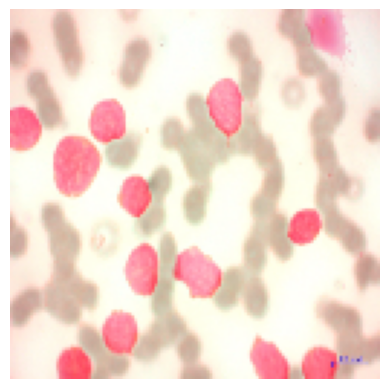

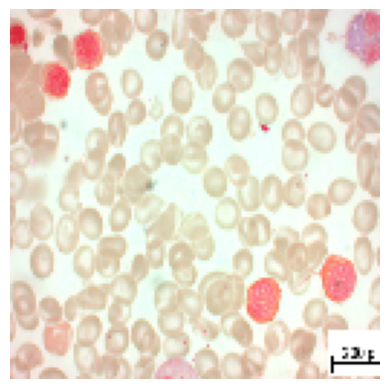

In [34]:
# Menampilkan gambar dari dataset yang telah diproses
def show_processed_images(images, num_samples=5):
    for i in range(num_samples):
        plt.imshow(images[i])
        plt.axis('off')
        plt.show()

# Contoh menampilkan gambar yang telah diproses
show_processed_images(X_train[:5])